<a href="https://colab.research.google.com/github/vickyskarthik/ModernCV/blob/main/Modern_Computer_Vision_Day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modern Computer Vision



In [2]:
student_name = "karthik"
save_dir = "/content/cv_day"
device_preference = "cuda"
download_assets_now = True

print(f"Hello, {student_name}! Files will be saved to: {save_dir}")
import os
os.makedirs(save_dir, exist_ok=True)


Hello, karthik! Files will be saved to: /content/cv_day


In [4]:
import sys, subprocess, importlib

def ensure(pkgs):
    def _pip(*args): subprocess.check_call([sys.executable, "-m", "pip", *args])
    for p in pkgs:
        mod = p.split("==")[0].replace("-", "_")
        try:
            importlib.import_module(mod)
            print(f"[OK] {p} already present")
        except Exception:
            print(f"[INSTALL] {p}")
            _pip("install", p)

# Core for this workshop
core = [
    "opencv-python-headless",
    "ultralytics",
    "pillow",
    "mediapipe",
    "scikit-image",
]

# Optional extras (enable if you’ll use them)
extras = [
    # "onnx",
    # "onnxruntime",
    # "gradio",
]

# Torch is usually present in Colab; install only if missing
try:
    import torch, torchvision
    print("[OK] torch/torchvision present")
except Exception:
    print("[WARN] torch/torchvision missing; installing CPU wheels")
    extras += ["torch", "torchvision"]

ensure(core + extras)


[WARN] torch/torchvision missing; installing CPU wheels
[INSTALL] opencv-python-headless
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
[OK] ultralytics already present
[INSTALL] pillow
[INSTALL] mediapipe
[INSTALL] scikit-image
[OK] torch already present
[INSTALL] torchvision


In [6]:
# Plot helpers
# Simple imshow wrapper for BGR/GRAY numpy arrays.
import cv2
def imshow(img, title=None, cmap=None):
    plt.figure()
    if img.ndim == 2:
        # image has only H x W, treaded as grayscale
        plt.imshow(img, cmap=cmap or "gray")
    else:
        # image is treated as RGB image
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if title: plt.title(title)
    plt.axis("off")


In [5]:
#Downloader — sample images & videos
ASSETS = {
    # Images
    "chessboard":"https://raw.githubusercontent.com/opencv/opencv/master/samples/data/chessboard.png",
    "lena":"https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg",
    "building":"https://raw.githubusercontent.com/opencv/opencv/master/samples/data/building.jpg",
    "fruits":"https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg",
    # Video
    "vtest":"https://raw.githubusercontent.com/opencv/opencv/master/samples/data/vtest.avi",
}

def download_assets(save_dir):
    save = Path(save_dir)
    (save / "assets").mkdir(parents=True, exist_ok=True)
    for name, url in ASSETS.items():
        out = save / "assets" / Path(url).name
        if not out.exists():
            print("Downloading", name, "from", url)
            urllib.request.urlretrieve(url, out)
        else:
            print("Exists:", out.name)
    print("Done.")

if download_assets_now:
    download_assets(save_dir)


Done.


Save dir: /content/cv_day
Files: ['fruits.jpg', 'lena.jpg', 'chessboard.png', 'building.jpg', 'vtest.avi']
Loaded: <class 'numpy.ndarray'> (512, 512, 3)


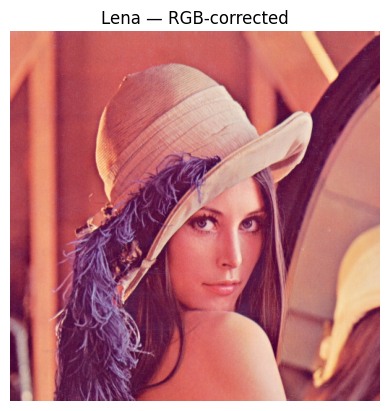

In [8]:
print("Save dir:", save_dir)
assets = Path(save_dir) / "assets"
# print the list of images in the directory
print("Files:", [p.name for p in assets.iterdir()])

img = cv2.imread(str(assets / "lena.jpg"))
# print the shape of the image
print("Loaded:", type(img), img.shape if img is not None else None)
# Visualize the image
imshow(img, "Lena — RGB-corrected")

Video opened: True First frame: True Shape: (576, 768, 3)


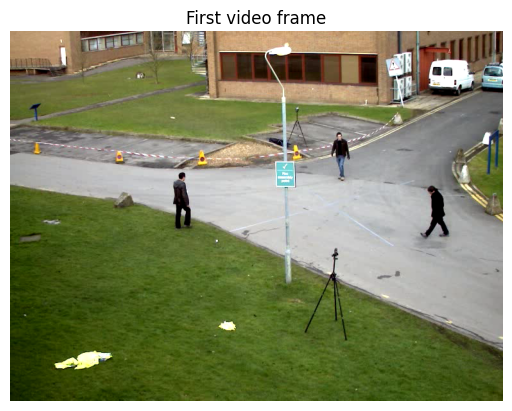

In [12]:
# Test the video
# Creates a video-capture object to read frames from a file.
# str(...) converts the Path to a string for OpenCV
cap = cv2.VideoCapture(str(assets / "vtest.avi"))
Ready, frame = cap.read()
print("Video opened:", cap.isOpened(), "First frame:", Ready, "Shape:", frame.shape if Ready else None)
if Ready:
    imshow(frame, "First video frame")
cap.release()

## Module 0 — Warm‑up & Python/NumPy refresher
Quick start: arrays, slicing, broadcasting, dtype, plotting.


Shape: (512, 512, 3) dtype: uint8


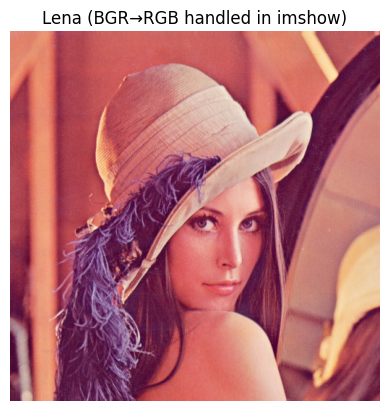

In [13]:
from pathlib import Path
import cv2

assets = Path(save_dir) / "assets"
#Files: ['fruits.jpg', 'lena.jpg', 'chessboard.png', 'building.jpg']
img = cv2.imread(str(assets / "_______"))
print("Shape:", img.shape, "dtype:", img.dtype)
imshow(img, "Lena (BGR→RGB handled in imshow)")

Gray shape: (512, 512) dtype: uint8


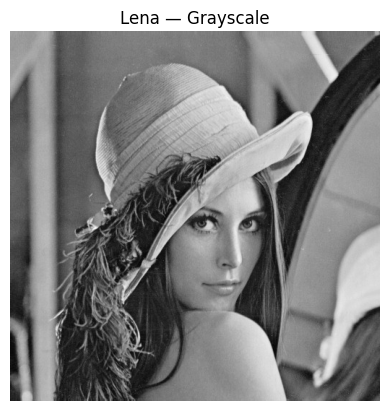

In [14]:
# Convert to grayscale and visualize
gray = cv2.cvtColor(___, cv2.COLOR_BGR2GRAY)
print("Gray shape:", gray.shape, "dtype:", gray.dtype)
imshow(gray, "Lena — Grayscale", cmap="gray")

ROI shape: (100, 100, 3)


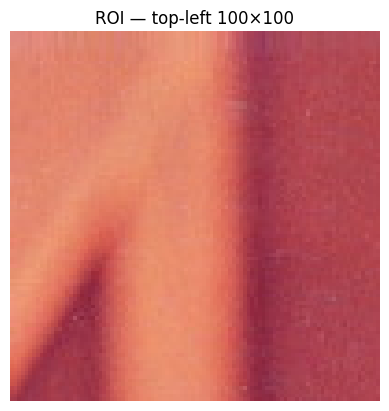

In [15]:
# Slice (crop) a region of interest
# Top-left 100×100 crop
roi = img[0:___, 0:___]
print("ROI shape:", roi.shape)
imshow(roi, "ROI — top-left 100×100")

Channel shapes: (512, 512) (512, 512) (512, 512)


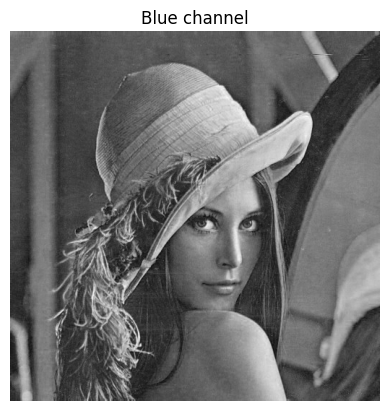

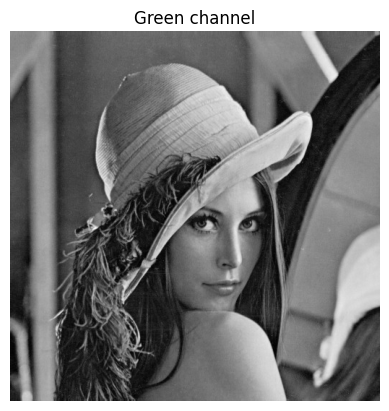

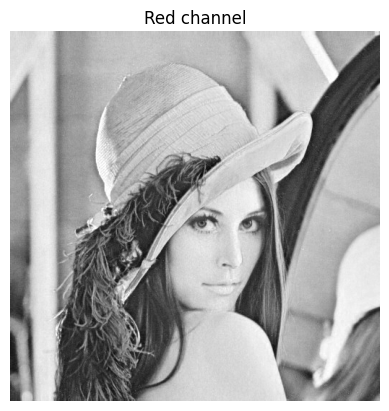

In [16]:
# Split and inspect channels
b, g, r = cv2.split(img)   # remember: OpenCV stores as B,G,R
print("Channel shapes:", b.shape, g.shape, r.shape)
imshow(_, "Blue channel", cmap="gray")
imshow(_, "Green channel", cmap="gray")
imshow(_, "Red channel", cmap="gray")


## 1) Image Basics: Pixels, Shapes, Color Spaces
- Image = 2D/3D array: H×W×C
- Color spaces: BGR (OpenCV), RGB (matplotlib), GRAY, HSV, LAB
- I/O and display pitfalls


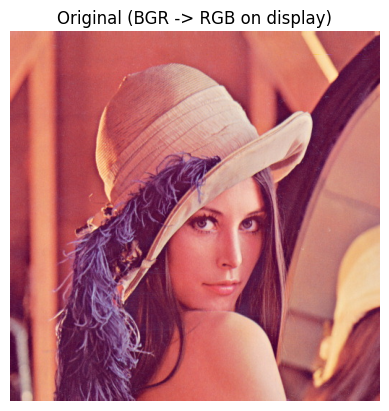

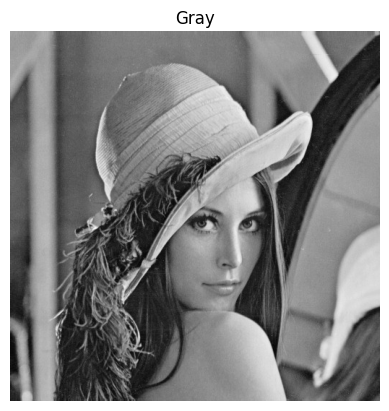

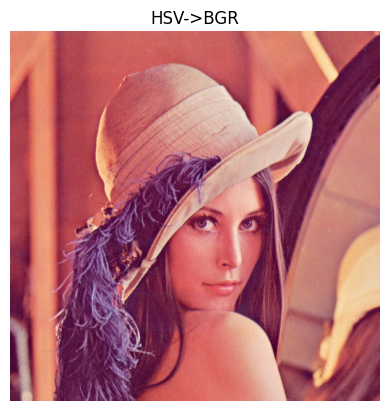

In [17]:
import os, cv2
img = cv2.imread(os.path.join(save_dir, "assets", "lena.jpg"))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv  = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imshow(img, "Original")
imshow(gray, "Gray", cmap="gray")
imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR), "HSV->BGR")


## 2) Convolution & Filtering (Blur/Sharpen)
- Kernel convolution, separable filters
- Gaussian blur, Unsharp masking


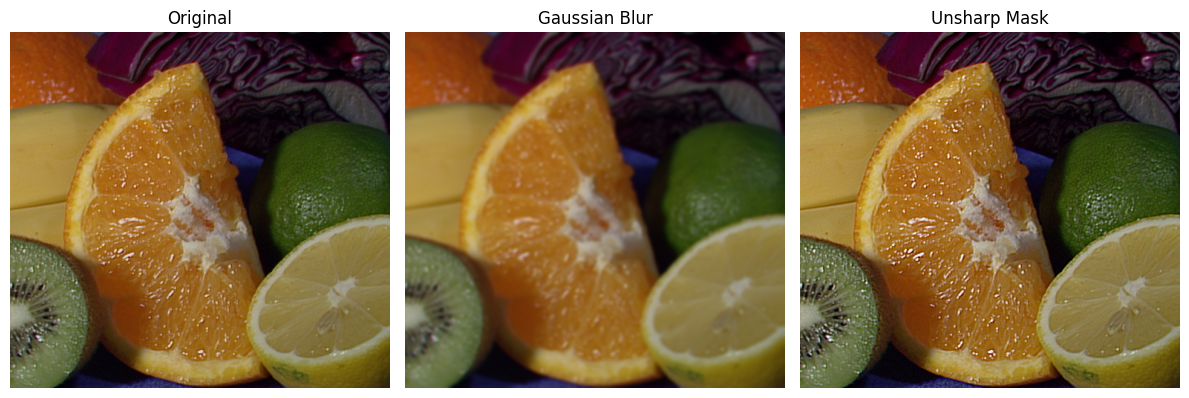

In [22]:
import cv2, os, numpy as np
___ = cv2.imread(os.path.join(save_dir, "assets", "fruits.jpg"))

# Applies a Gaussian blur.
# kernel size must be odd, e.g., 3,5,7,9
# 2.0 is σ (sigma). Higher σ = stronger blur
____ = cv2.GaussianBlur(img, (9,9), 2.0)

#enhances edges by subtracting some blur from the original.
_____ = cv2.addWeighted(img, 1.5, blur, -0.5, 0)

orig_rgb  = cv2.cvtColor(img,   cv2.COLOR_BGR2RGB)
blur_rgb  = cv2.cvtColor(blur,  cv2.COLOR_BGR2RGB)
sharp_rgb = cv2.cvtColor(sharp, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(orig_rgb);  axes[0].set_title("Original");      axes[0].axis("off")
axes[1].imshow(blur_rgb);  axes[1].set_title("Gaussian Blur"); axes[1].axis("off")
axes[2].imshow(sharp_rgb); axes[2].set_title("Unsharp Mask");  axes[2].axis("off")
plt.tight_layout()
plt.show()


## 3) Gradients & Edges (Sobel, Canny)
- Intensity gradients
- Edge detection with Canny (thresholds! noise!)


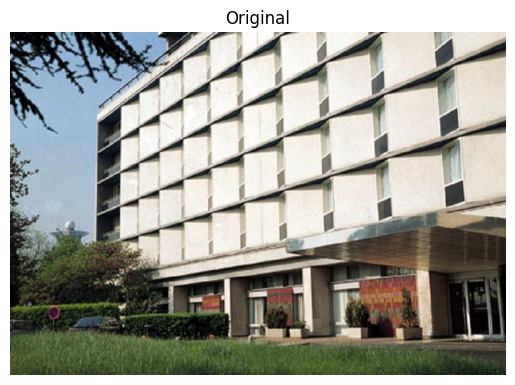

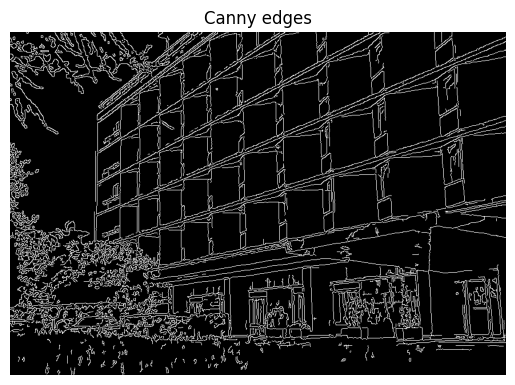

In [23]:
import cv2, os
img = cv2.imread(os.path.join(save_dir, "assets", "building.jpg"))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
'''Canny edges — a grayscale image the same size, where:
White (255) pixels mark detected edges,
Black (0) is non-edge background.'''

edges = cv2.Canny(gray, 80, 160)
# TODO: Try (50,150), (100,200)
imshow(img, "Original")
imshow(_____, "Canny edges", cmap="gray")


## 4) Morphology & Contours
- Dilate, erode, open, close
- Thresholding & contour detection


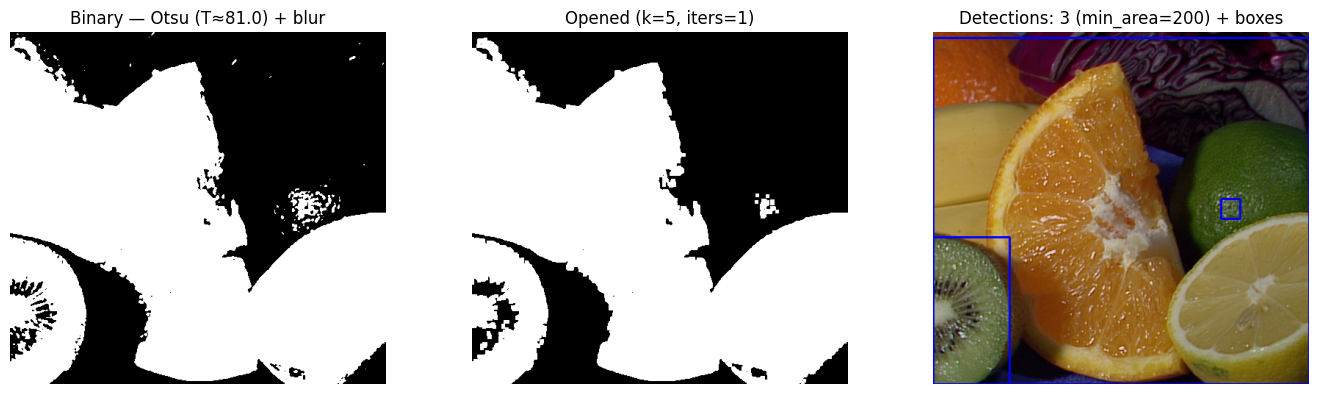

[INFO] fruits.jpg | mode=Otsu (T≈81.0), invert=False, blur=True (ksize=5, sigma=1.0) | open kernel=5 iters=1
[INFO] Contours kept: 3 (min_area=200); mean area=46750.2, median area=13426.5


In [29]:
#@title Morphology & Contours
# This cell shows: grayscale -> (optional blur) -> threshold (Otsu or manual)
# -> morphological opening -> contour detection -> visualization (1 row).
# ToDO
# Change the values in the form fields below
# and re-run the cell.

import os, cv2, numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ====== STUDENT CONTROLS (use the dropdowns/fields, then Run) ======
image_name = "fruits.jpg"  #@param ["fruits.jpg", "building.jpg", "lena.jpg"]
use_blur = True             #@param {type:"boolean"}
blur_ksize = 5              #@param {type:"integer"}
blur_sigma = 1.0            #@param {type:"number"}
use_otsu = True             #@param {type:"boolean"}
manual_thresh = 128         #@param {type:"integer"}
invert_binary = False       #@param {type:"boolean"}
kernel_size = 5             #@param {type:"integer"}
iterations = 1              #@param {type:"integer"}
min_area = 200              #@param {type:"integer"}
show_boxes = True           #@param {type:"boolean"}

# --- Safety clamps for odd kernel sizes
# (OpenCV needs odd sizes for many ops) ---
def make_odd(x, min_val=1):
    x = int(max(x, min_val))
    return x if x % 2 == 1 else x + 1

blur_ksize = make_odd(blur_ksize)
kernel_size = max(1, int(kernel_size))  # morphology kernel can be even/odd

# ====== 1) Load image ======
assets = Path(save_dir) / "assets"
img_path = assets / image_name
img = cv2.imread(str(img_path))
if img is None:
    raise FileNotFoundError(f"Could not load {img_path}. Check save_dir and assets.")

# ====== 2) Convert to grayscale ======
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ====== 3) Optional blur
# (reduces noise before thresholding) ======
# Try turning blur on/off, and
# vary blur_ksize/sigma to see
# how edges & speckles change.
if use_blur:
    gray_for_thresh = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize), blur_sigma)
else:
    gray_for_thresh = gray.copy()

# ====== 4) Threshold to get a binary image (black/white) ======
# Two choices:
#  - Otsu (automatic threshold): great when lighting is uniform.
#  - Manual threshold: set a fixed value (0..255) and see how it behaves.
if use_otsu:
    mode = cv2.THRESH_BINARY if not invert_binary else cv2.THRESH_BINARY_INV
    T, bw = cv2.threshold(gray_for_thresh, 0, 255, mode + cv2.THRESH_OTSU)
    thresh_info = f"Otsu (T≈{T:.1f})"
else:
    T = int(np.clip(manual_thresh, 0, 255))
    mode = cv2.THRESH_BINARY if not invert_binary else cv2.THRESH_BINARY_INV
    _, bw = cv2.threshold(gray_for_thresh, T, 255, mode)
    thresh_info = f"Manual (T={T})"

# ====== 5) Morphological opening (erode then dilate) ======
# Removes small white speckles and smooths object boundaries.
kernel = np.ones((kernel_size, kernel_size), np.uint8)
opened = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel, iterations=iterations)

# ====== 6) Find contours on the cleaned mask ======
# RETR_EXTERNAL = only outer contours; CHAIN_APPROX_SIMPLE = fewer points
contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Optional: filter out tiny blobs so we focus on meaningful objects
filtered = [c for c in contours if cv2.contourArea(c) >= max(0, min_area)]

# ====== 7) Visualize results ======
# Prepare overlays:
out_contours = img.copy()
cv2.drawContours(out_contours, filtered, -1, (0,255,0), 2)  # green outlines

out_boxes = img.copy()
if show_boxes:
    for c in filtered:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(out_boxes, (x,y), (x+w,y+h), (255,0,0), 2)  # blue boxes

# Build the row of images to compare each stage:
imgs   = [bw, opened, out_contours if not show_boxes else out_boxes]
titles = [
    f"Binary — {thresh_info}" + (" + blur" if use_blur else ""),
    f"Opened (k={kernel_size}, iters={iterations})",
    f"Detections: {len(filtered)} (min_area={min_area})" + (" + boxes" if show_boxes else " + contours")
]

# Plot in a single row
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax, im, t in zip(axes, imgs, titles):
    if im.ndim == 2:
        ax.imshow(im, cmap="gray")
    else:
        ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))  # BGR->RGB for Matplotlib
    ax.set_title(t)
    ax.axis("off")
plt.tight_layout()
plt.show()

# ====== 8) Quick textual summary (for learning checkpoints) ======
areas = [cv2.contourArea(c) for c in filtered]
print(f"[INFO] {image_name} | mode={thresh_info}, invert={invert_binary}, blur={use_blur} "
      f"(ksize={blur_ksize}, sigma={blur_sigma}) | open kernel={kernel_size} iters={iterations}")
print(f"[INFO] Contours kept: {len(filtered)} (min_area={min_area})"
      + (f"; mean area={np.mean(areas):.1f}, median area={np.median(areas):.1f}" if areas else ""))

In [30]:
# ====== STUDY GUIDE (what to vary) ======
# 1) Turn blur ON/OFF and change blur_ksize (3,5,9) and blur_sigma (0.5,1,2,3).
#    -> Observe speckles in 'Binary' and 'Opened'.
# 2) Switch between Otsu and Manual thresholds. For Manual, try T=80, 120, 160, 200.
#    -> How does foreground/background change? When would you invert?
# 3) Change kernel_size (3,5,9) and iterations (1,2,3) for the opening.
#    -> More cleanup vs. losing thin details.
# 4) Adjust min_area (e.g., 0, 100, 500, 2000).
#    -> Filters tiny detections; watch 'Detections: N'.
# 5) Toggle show_boxes to compare box vs. contour overlays.


## 5) Geometry: Transformations & Homographies
- Translation, rotation, scaling, perspective
- Homography warp using 4 point correspondences


h=1240, w=1754


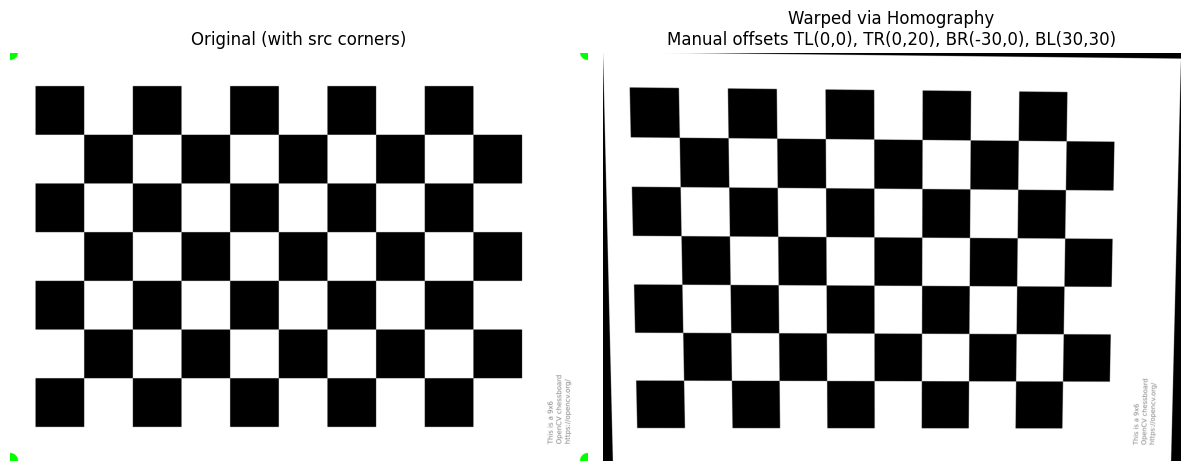

[TRY] Change presets to see different perspective effects.
[TRY] In Manual mode, adjust (dx,dy) for each corner:
      TL moves the top-left corner, TR the top-right, BR the bottom-right, BL the bottom-left.
      Positive dx -> right, negative dx -> left; positive dy -> down, negative dy -> up.
      Watch how straight lines in the chessboard stay straight after homography (projective transform).


In [35]:
#@title Homography Warp
# This cell warps the chessboard image by mapping its four corners to new positions.
# Pick a preset OR set manual (dx, dy) offsets for each corner and re-run.

import os, cv2, numpy as np, matplotlib.pyplot as plt
from pathlib import Path

# ========= STUDENT CONTROLS =========
preset = "Manual"  #@param ["Manual", "Tilt Left", "Tilt Right", "Top Keystone", "Bottom Keystone"]
# Top-Left (TL)
manual_dx_tl =  0   #@param {type:"integer"}
manual_dy_tl =  0   #@param {type:"integer"}
manual_dx_tr =  0   #@param {type:"integer"}
manual_dy_tr = 20   #@param {type:"integer"}
manual_dx_br = -30  #@param {type:"integer"}
manual_dy_br =  0   #@param {type:"integer"}
manual_dx_bl =  30  #@param {type:"integer"}
manual_dy_bl = 30   #@param {type:"integer"}

# ========= Load image =========
img_path = Path(save_dir) / "assets" / "chessboard.png"
img = cv2.imread(str(img_path))
if img is None:
    raise FileNotFoundError(f"Could not load {img_path}. Check save_dir/assets.")
h, w = img.shape[:2]
print(f"h={h}, w={w}")

# Source corners (in pixel coords): TL, TR, BR, BL
src = np.float32([
    [0,     0    ],   # top-left
    [w - 1, 0    ],   # top-right
    [w - 1, h - 1],   # bottom-right
    [0,     h - 1],   # bottom-left
])

# ========= Build destination corners from preset/manual =========
def clamp_xy(x, y, W, H):
    return float(np.clip(x, 0, W - 1)), float(np.clip(y, 0, H - 1))

if preset == "Tilt Left":
    dx = [-40,  40,  40, -40]
    dy = [ 20,  20, -20, -20]
elif preset == "Tilt Right":
    dx = [ 40, -40, -40,  40]
    dy = [ 20,  20, -20, -20]
elif preset == "Top Keystone":
    dx = [ 40, -40,  0,   0 ]
    dy = [ 30,  30,  0,   0 ]
elif preset == "Bottom Keystone":
    dx = [ 0,   0,  -40,  40]
    dy = [ 0,   0,   30,  30]
else:  # Manual
    dx = [manual_dx_tl, manual_dx_tr, manual_dx_br, manual_dx_bl]
    dy = [manual_dy_tl, manual_dy_tr, manual_dy_br, manual_dy_bl]

dst = []
for (x, y), ddx, ddy in zip(src, dx, dy):
    nx, ny = clamp_xy(x + ddx, y + ddy, w, h)
    dst.append([nx, ny])
dst = np.float32(dst)

# ========= Compute homography & warp =========
H = cv2.getPerspectiveTransform(src, dst)
warped = cv2.warpPerspective(img, H, (w, h))

# ========= Visual aids: draw corners on original =========
orig_marked = img.copy()
for i, (x, y) in enumerate(src.astype(int)):
    cv2.circle(orig_marked, (x, y), 24, (0, 255, 0), -1)  # green source points
    cv2.putText(orig_marked, ["TL","TR","BR","BL"][i], (x+5, y-5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)

# ========= Show in one row =========
def to_rgb(bgr): return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
titles = [
    "Original (with src corners)",
    f"Warped via Homography\npreset={preset}"
    if preset != "Manual" else
    f"Warped via Homography\nManual offsets TL({dx[0]},{dy[0]}), TR({dx[1]},{dy[1]}), BR({dx[2]},{dy[2]}), BL({dx[3]},{dy[3]})"
]
imgs = [orig_marked, warped]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, im, t in zip(axes, imgs, titles):
    ax.imshow(to_rgb(im))
    ax.set_title(t)
    ax.axis("off")
plt.tight_layout(); plt.show()

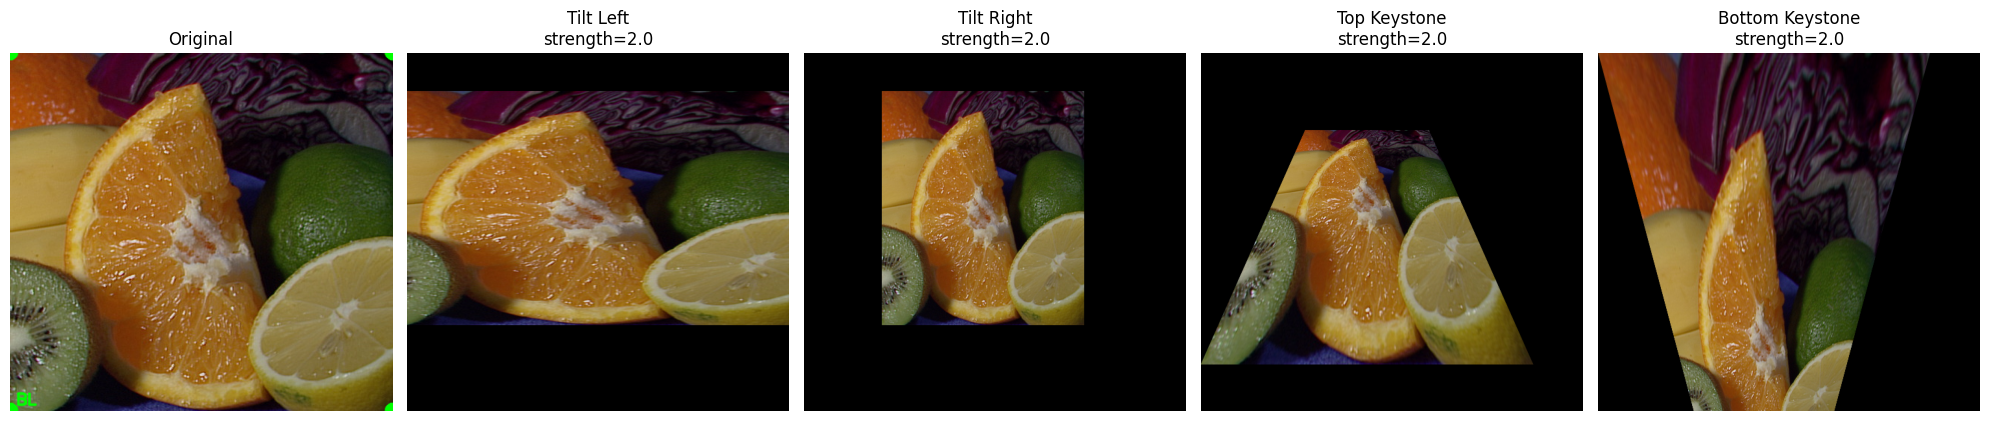

In [41]:
#@title Homography — Strong Tilts with Strength & Canvas Controls
# Bigger, more noticeable perspective warps side-by-side, with a strength slider.

import os, cv2, numpy as np, matplotlib.pyplot as plt
from pathlib import Path

# === Controls ===
strength = 2.0        #@param {type:"number"}  # 1.0 = mild, 2.0 = strong, 3.0 = extreme
canvas_scale = 1.15   #@param {type:"number"}  # enlarge output canvas to avoid clipping (1.0..1.4)
border_mode = "constant (black)"  #@param ["constant (black)","replicate","reflect"]
show_src_corners = True  #@param {type:"boolean"}

# Load chessboard
img_path = Path(save_dir) / "assets" / "fruits.jpg"
img = cv2.imread(str(img_path))
if img is None:
    raise FileNotFoundError(f"Could not load {img_path}.")
h, w = img.shape[:2]

# Source corners TL, TR, BR, BL
src = np.float32([[0,0],[w-1,0],[w-1,h-1],[0,h-1]])

# Base (mild) displacements; we multiply by `strength`
base = {
    "Tilt Left":       ([-40,  60,  60, -40], [ 30,  30, -30, -30]),
    "Tilt Right":      ([ 60, -40, -40,  60], [ 30,  30, -30, -30]),
    "Top Keystone":    ([ 80, -80,   0,   0], [ 60,  60,   0,   0]),
    "Bottom Keystone": ([  0,   0, -80,  80], [  0,   0,  60,  60]),
}

# Map border mode
bm = {
    "constant (black)": cv2.BORDER_CONSTANT,
    "replicate":        cv2.BORDER_REPLICATE,
    "reflect":          cv2.BORDER_REFLECT
}[border_mode]

# Output canvas (slightly larger to avoid cropping on strong tilts)
Wout = int(round(w * canvas_scale))
Hout = int(round(h * canvas_scale))

def to_rgb(bgr): return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

def warp_with_offsets(img, src, dx, dy, s=1.0):
    dx = [d*s for d in dx]
    dy = [d*s for d in dy]
    dst = np.float32([[x+dxi, y+dyi] for (x, y), dxi, dyi in zip(src, dx, dy)])
    H = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, H, (Wout, Hout), flags=cv2.INTER_LINEAR, borderMode=bm)
    return warped, dst

def mark_corners(image, corners, color=(0,255,0)):
    marked = image.copy()
    for i, (x, y) in enumerate(corners.astype(int)):
        cv2.circle(marked, (x, y), 10, color, -1, lineType=cv2.LINE_AA)
        cv2.putText(marked, ["TL","TR","BR","BL"][i], (x+8, y-8),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2, cv2.LINE_AA)
    return marked

# Prepare originals (optionally with corner markers)
orig = img
if show_src_corners:
    orig = mark_corners(orig, src, (0,255,0))

# Compute warps
results = [("Original", orig)]
for name, (dx, dy) in base.items():
    warped, dst = warp_with_offsets(img, src, dx, dy, s=strength)
    results.append((f"{name}\nstrength={strength:.1f}", warped))

# Show in one row
fig, axes = plt.subplots(1, len(results), figsize=(20, 5))
for ax, (title, im) in zip(axes, results):
    ax.imshow(to_rgb(im))
    ax.set_title(title)
    ax.axis("off")
plt.tight_layout();
plt.show()

## 6) Camera Model: Calibration & Undistortion
- Pinhole model, distortion
- Show undistortion conceptually (using chessboard if time permits)


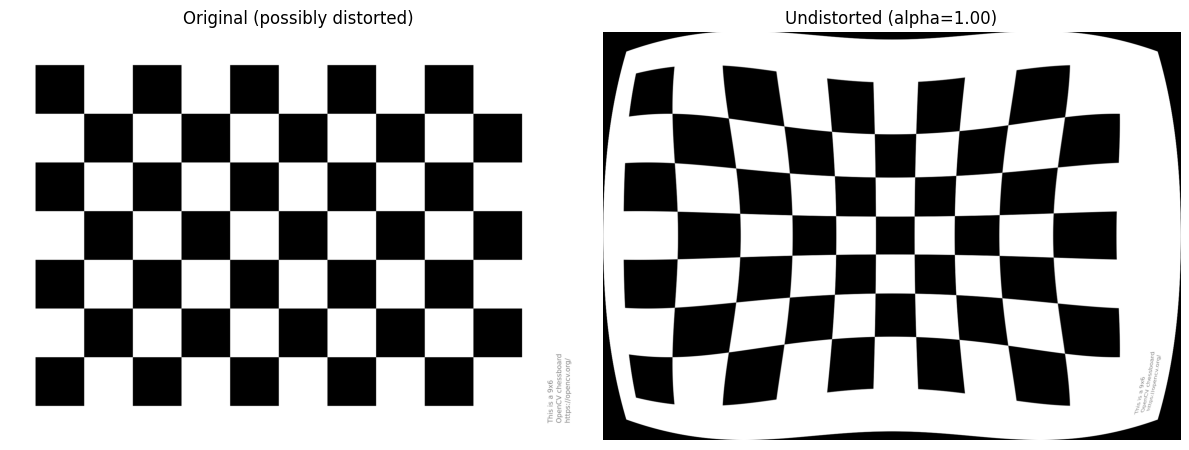

K =
[[        800           0         877]
 [          0         800         620]
 [          0           0           1]]
D = [k1=-0.300, k2=0.100, p1=0.000, p2=0.000]
New K (alpha=1.00) =
[[     633.49           0      876.87]
 [          0         620         620]
 [          0           0           1]]
ROI (suggested crop): (17, 26, 1718, 1186)  # You can crop to this rectangle to remove borders.


In [42]:
#@title Camera Model & Undistortion
# This demo simulates lens distortion on the chessboard image and then undistorts it.
# Change the sliders/fields and re-run to see how the correction changes.

import cv2, numpy as np, matplotlib.pyplot as plt, os
from pathlib import Path

# ====== STUDENT CONTROLS ======
image_name = "chessboard.png"    #@param ["chessboard.png", "building.jpg", "fruits.jpg"]
fx = 800.0        #@param {type:"number"}  # focal length x (pixels)
fy = 800.0        #@param {type:"number"}  # focal length y (pixels)
cx_offset = 0.0   #@param {type:"number"}  # principal point offset x (pixels, relative to center)
cy_offset = 0.0   #@param {type:"number"}  # principal point offset y (pixels, relative to center)

# Radial distortion: k1, k2 (barrel <0, pincushion >0); Tangential: p1, p2
k1 = -0.30        #@param {type:"number"}
k2 =  0.10        #@param {type:"number"}
p1 =  0.00        #@param {type:"number"}
p2 =  0.00        #@param {type:"number"}

# "Alpha" (free scaling parameter) controls cropping vs black borders in new intrinsics
# 0.0 = crop tightly (no black), 1.0 = keep full FOV (allow black borders)
alpha = 1.0       #@param {type:"number"}

# ====== LOAD IMAGE ======
img = cv2.imread(str(Path(save_dir) / "assets" / image_name))
if img is None:
    raise FileNotFoundError("Could not load image. Check save_dir/assets.")
h, w = img.shape[:2]

# ====== INTRINSICS (K) ======
# Principal point centered at (w/2 + cx_offset, h/2 + cy_offset)
cx = w/2.0 + cx_offset
cy = h/2.0 + cy_offset
K = np.array([[fx, 0,  cx],
              [0,  fy, cy],
              [0,  0,  1 ]], dtype=np.float32)

# ====== DISTORTION COEFFS (D) ======
# OpenCV expects [k1, k2, p1, p2, k3] for plumb_bob; we’ll use 4-coeff version here
D = np.array([k1, k2, p1, p2], dtype=np.float32)

# ====== COMPUTE NEW CAMERA MATRIX (controls cropping via alpha) ======
# alpha in [0..1]; (w,h) is the desired image size for the undistorted output
newK, roi = cv2.getOptimalNewCameraMatrix(K, D, (w, h), alpha, (w, h))

# ====== RECTIFY MAPS & REMAP ======
map1, map2 = cv2.initUndistortRectifyMap(K, D, None, newK, (w, h), cv2.CV_16SC2)
undist = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR)

# ====== VISUALIZE SIDE-BY-SIDE ======
def to_rgb(bgr): return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

titles = [
    "Original (possibly distorted)",
    f"Undistorted (alpha={alpha:.2f})"
]
imgs = [img, undist]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, im, t in zip(axes, imgs, titles):
    ax.imshow(to_rgb(im))
    ax.set_title(t)
    ax.axis("off")
plt.tight_layout(); plt.show()

# ====== SUMMARY (printed) ======
print(f"K =\n{K}")
print(f"D = [k1={k1:.3f}, k2={k2:.3f}, p1={p1:.3f}, p2={p2:.3f}]")
print(f"New K (alpha={alpha:.2f}) =\n{newK}")
print(f"ROI (suggested crop): {roi}  # You can crop to this rectangle to remove borders.")


## 7) Local Features: Harris/ORB
- Corners (Harris)
- ORB keypoints & descriptors (SIFT/SURF need contrib or have licensing baggage)


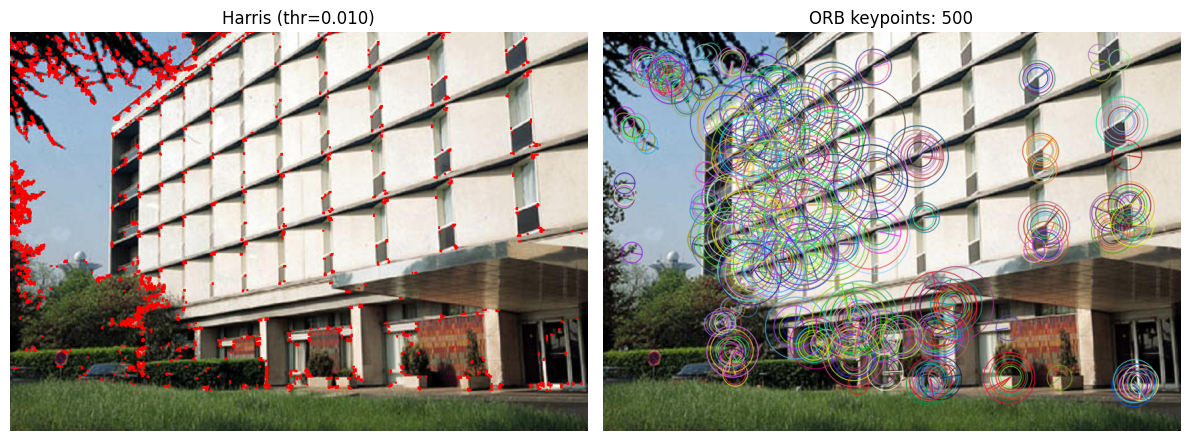

[Try] Harris: increase h_thresh_ratio (e.g., 0.02 → 0.05) to reduce red points.
[Try] Harris: change h_blockSize (2,3,5) and h_ksize (3,5,7); notice sensitivity/noise.
[Try] ORB: increase orb_fastThreshold (e.g., 7 → 20 → 30) for fewer, stronger keypoints.
[Try] ORB: scaleFactor 1.1 vs 1.4, nlevels 4 vs 8 — affects multi-scale detection.


In [44]:
#@title Harris & ORB — Beginner demo with controls (single-row viz)
import os, cv2, numpy as np, matplotlib.pyplot as plt
from pathlib import Path

# ===== Student controls =====
image_name = "building.jpg"   #@param ["building.jpg", "fruits.jpg", "lena.jpg"]
# Harris parameters
h_blockSize = 2               #@param {type:"integer"}
h_ksize = 3                   #@param {type:"integer"}
h_k = 0.04                    #@param {type:"number"}
h_thresh_ratio = 0.01         #@param {type:"number"}  # fraction of max response to mark

# ORB parameters
orb_nfeatures = 500           #@param {type:"integer"}
orb_scaleFactor = 1.2         #@param {type:"number"}
orb_nlevels = 8               #@param {type:"integer"}
orb_edgeThreshold = 31        #@param {type:"integer"}
orb_fastThreshold = 20        #@param {type:"integer"}  # higher = fewer keypoints

# ===== Load & gray =====
img_path = Path(save_dir) / "assets" / image_name
img = cv2.imread(str(img_path))
if img is None:
    raise FileNotFoundError(f"Could not load {img_path}.")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ===== Harris corners =====
# Harris works on float32 grayscale; blockSize: neighborhood size; ksize: Sobel aperture
h_ksize = max(3, int(h_ksize) | 1)  # force odd >=3
Hc = cv2.cornerHarris(np.float32(gray), int(h_blockSize), int(h_ksize), float(h_k))
Hc = cv2.dilate(Hc, None)
thr = float(h_thresh_ratio) * Hc.max()
harris = img.copy()
harris[Hc > thr] = [0, 0, 255]   # mark strong corners in red (B, G, R)

# ===== ORB features =====
orb = cv2.ORB_create(
    nfeatures=int(orb_nfeatures),
    scaleFactor=float(orb_scaleFactor),
    nlevels=int(orb_nlevels),
    edgeThreshold=int(orb_edgeThreshold),
    fastThreshold=int(orb_fastThreshold),
)
kps, desc = orb.detectAndCompute(gray, None)
orb_vis = cv2.drawKeypoints(img, kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# ===== Single-row visualization =====
def to_rgb(bgr): return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
titles = [f"Harris (thr={h_thresh_ratio:.3f})", f"ORB keypoints: {len(kps)}"]
imgs = [harris, orb_vis]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, im, t in zip(axes, imgs, titles):
    ax.imshow(to_rgb(im))
    ax.set_title(t)
    ax.axis("off")
plt.tight_layout(); plt.show()

# ===== Study prompts =====
print("[Try] Harris: increase h_thresh_ratio (e.g., 0.02 → 0.05) to reduce red points.")
print("[Try] Harris: change h_blockSize (2,3,5) and h_ksize (3,5,7); notice sensitivity/noise.")
print("[Try] ORB: increase orb_fastThreshold (e.g., 7 → 20 → 30) for fewer, stronger keypoints.")
print("[Try] ORB: scaleFactor 1.1 vs 1.4, nlevels 4 vs 8 — affects multi-scale detection.")
